<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 1: Генеративные сети</center></h2>

# Введение

Не все же нам MNIST генерировать. Давайте посмотрим, как генеративные модели могут использоваться не только для развлечения. Поехали!

Немного вступления и мотивации, для чего мы хотим обучать модель.

## MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ). 

MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/magic1.jpg?raw=1" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

#### Ок, давайте зафиксируем. Какой-то крутой телескоп позволяет открыть новые виды излучения. Идем дальше.
#### и это так офигенно!!!

## Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение. 
#### По фотографиям можно определить тип частицы из космоса: фотон или протон. Знакомая формулировка задачи, не правда ли?

<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/shower.jpg?raw=1" width="500"></center>

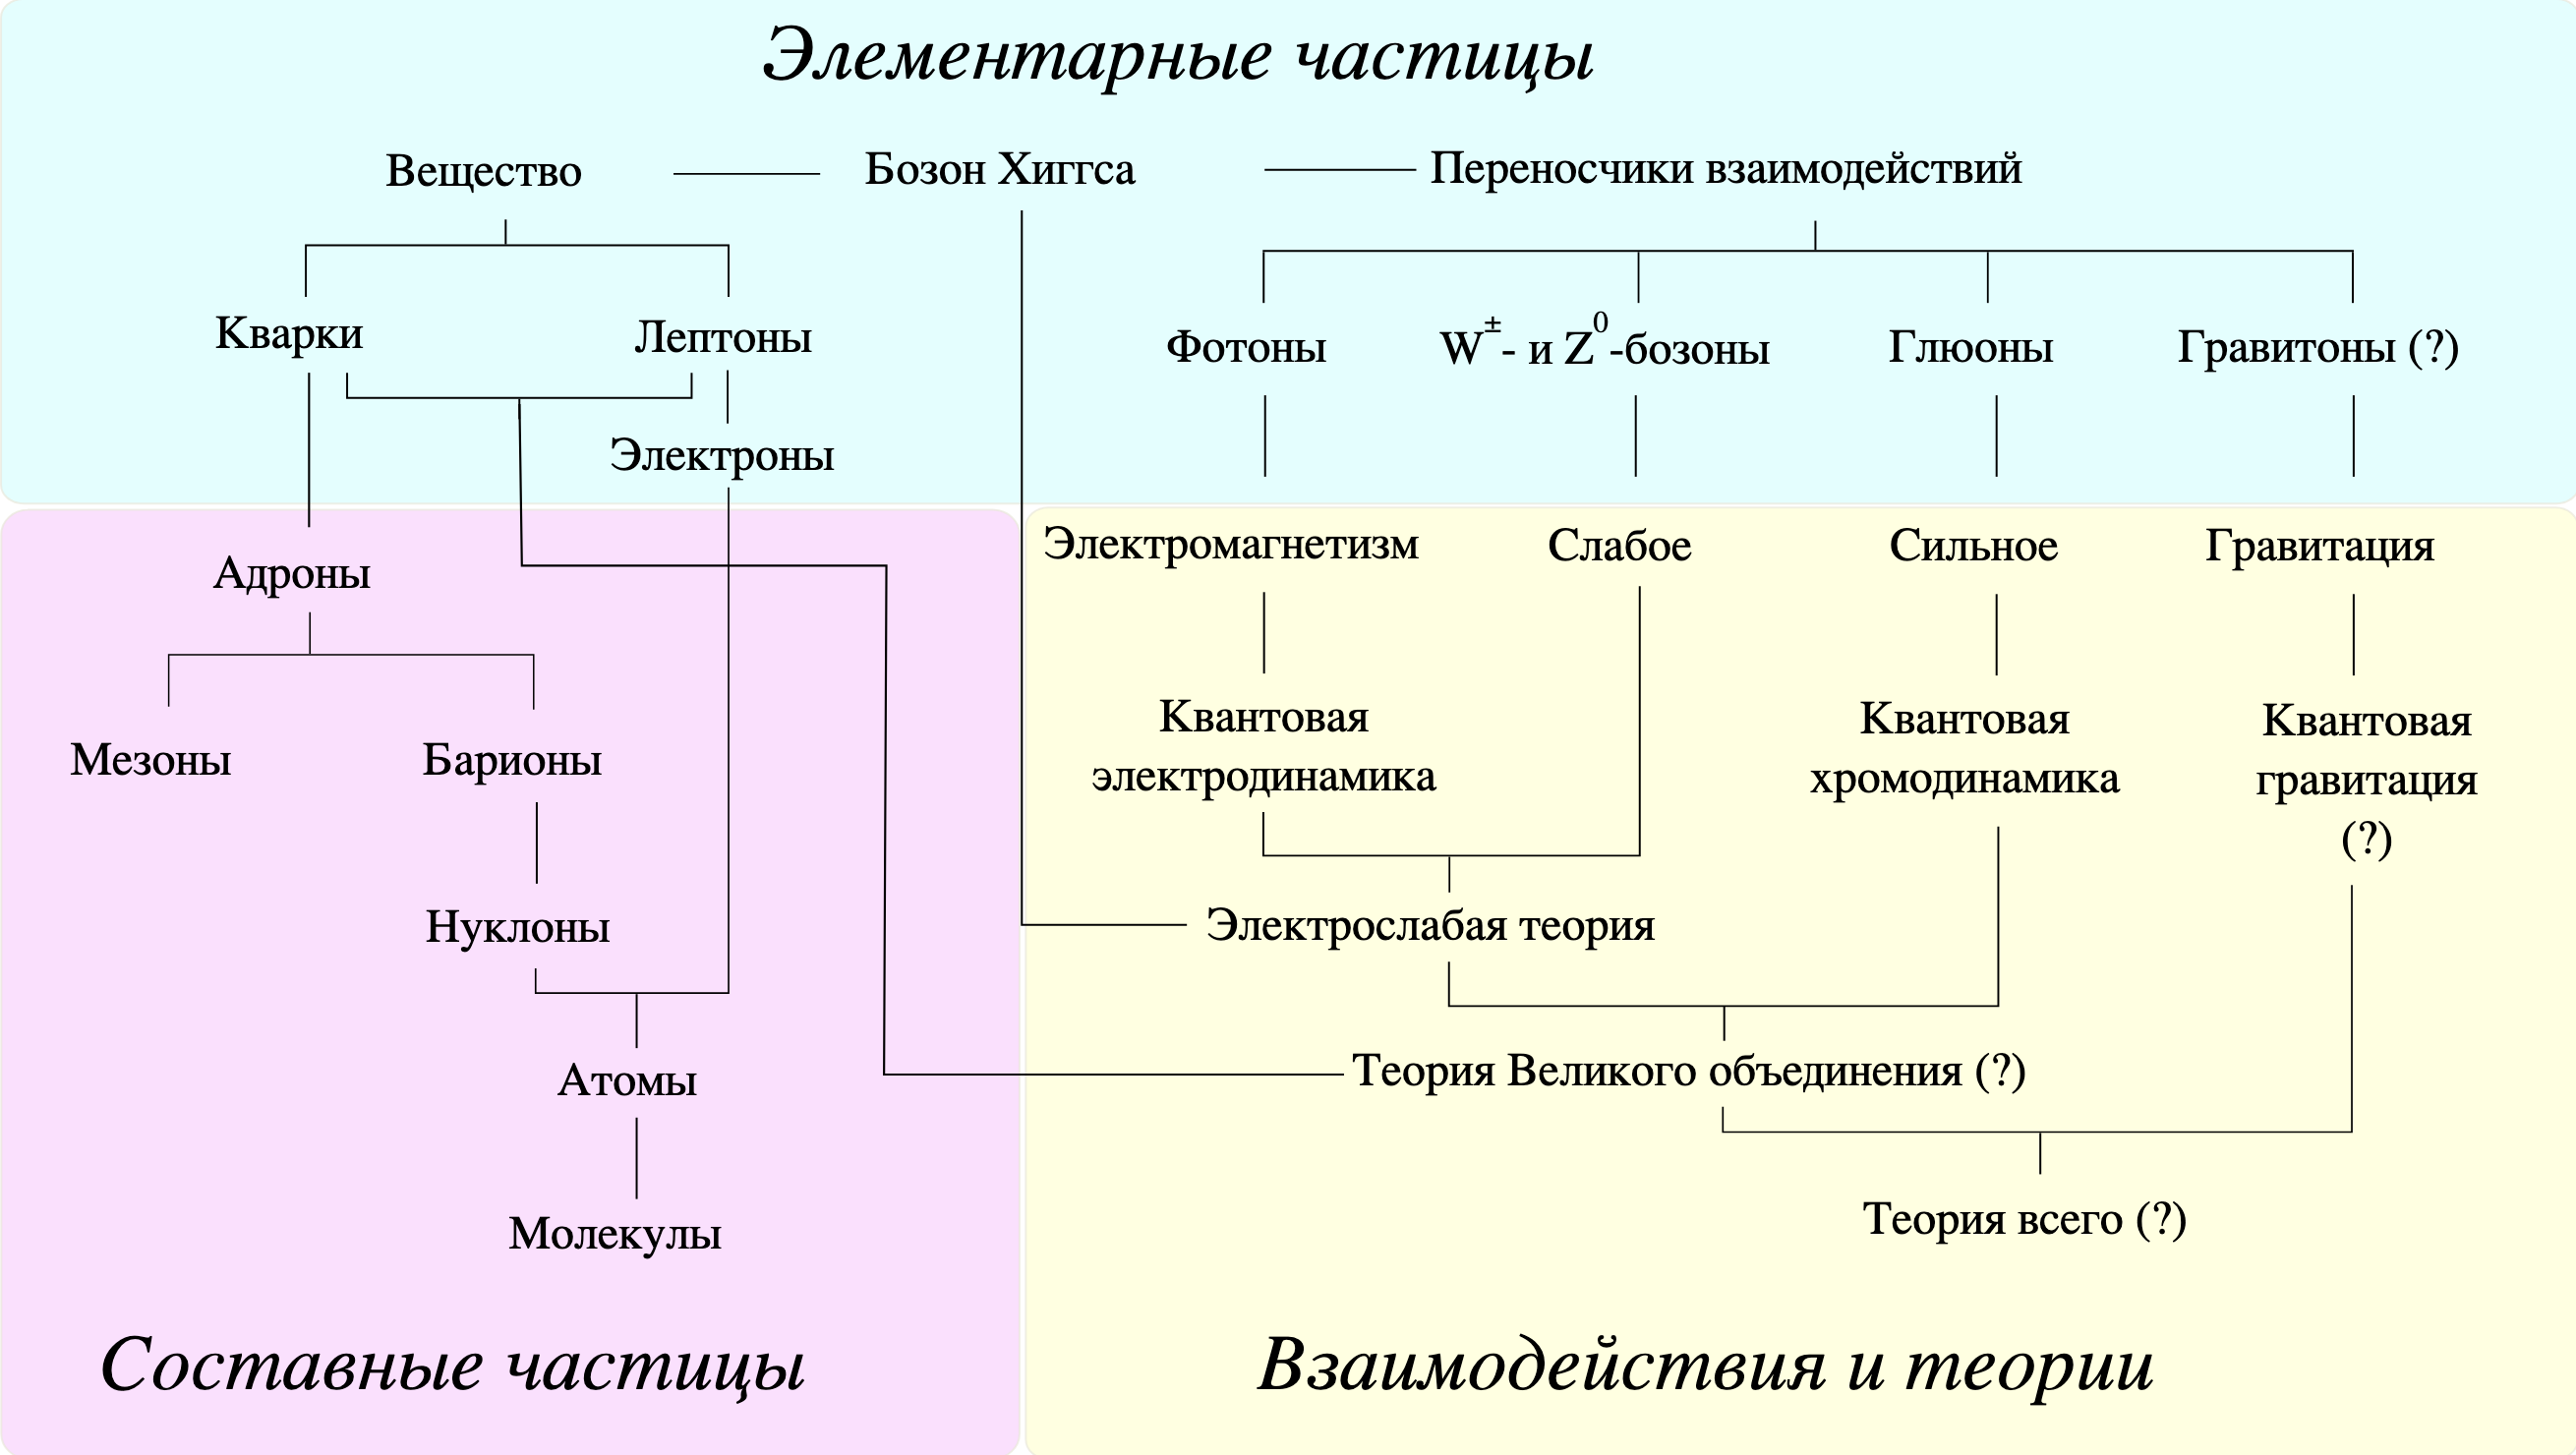

## Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.

<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/geo.jpg?raw=1" width="400"></center>

#### Итак, каждая фотография описывается набором параметров, которые за нас считает телесоп. А что там с двумя видами частиц?

## Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!


<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/gamma_p.png?raw=1" width="600"></center>

Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов. 

#### Итак, давайте сэкономим денег для ученых и сгенерируем хороших фотографий разных частиц. Используем для этого GAN и диффузионные модели!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):


0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [2]:
# read data
names = np.array(
    [
        "Length",
        "Width",
        "Size",
        "Conc",
        "Conc1",
        "Asym",
        "M3Long",
        "M3Trans",
        "Alpha",
        "Dist",
        "class",
    ]
)
data = pd.read_csv("https://github.com/lemon-doge/iad-applied-ds/raw/master/2023/hw/hw1/data/magic04.data", header=None)
data.columns = names
print(data.shape)
data.head()

(19020, 11)


,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Постановка задачи

Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [3]:
# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

In [49]:
# примеры
X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [50]:
# примеры
y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [51]:
# все возможные значения
np.unique(y)

array([0., 1.])

In [52]:
# баланс классов
y[y==0].size/y.size # ~ 1:2

0.3516298633017876

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распределения значений каждого параметра для каждого типа частиц.

In [4]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(5 * 4, 5 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")
        plt.hist(X2[:, i], bins=bins, alpha=0.3, label=label2, color="C0")
        plt.xlabel(names[i], size=14)
        plt.legend(loc="best")
    plt.tight_layout()

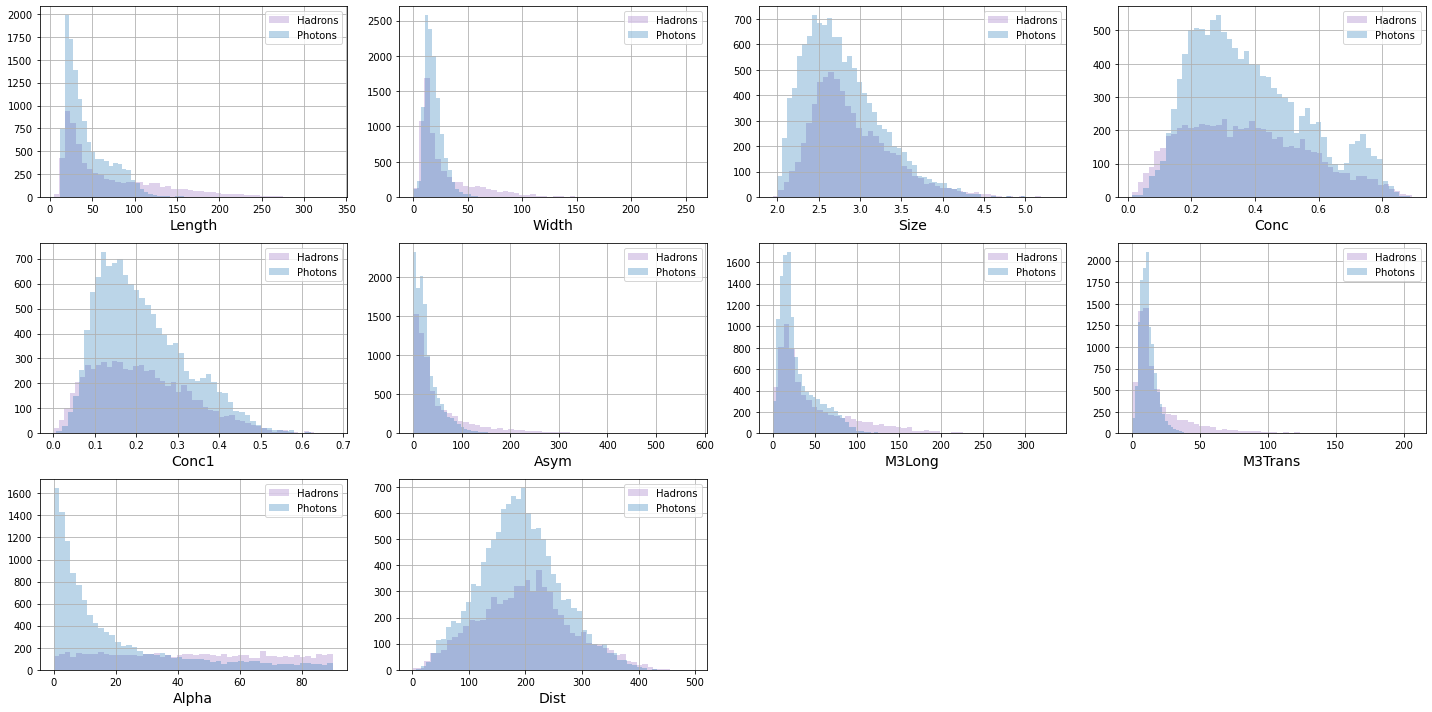

In [54]:
plot_hists(
    X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1="Hadrons", label2="Photons", bins=50
)

# Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты.

# Обучающая и тестовая выборки

In [4]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.5, shuffle = True, random_state = 11
)

## Задание 1 (0.2 балла)

Проиллюстрируйте распределение y внутри train и test выборки.

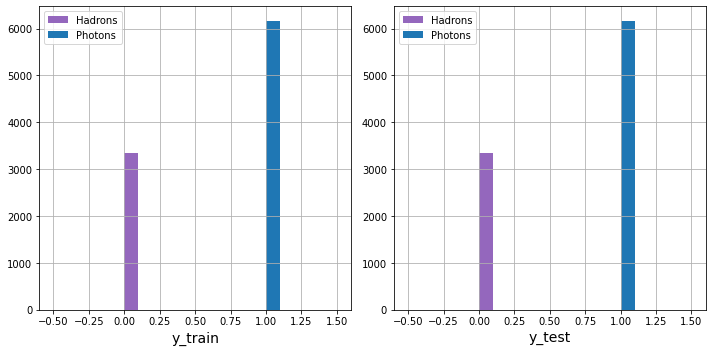

In [56]:
bins=50
label1="Hadrons"
label2="Photons"
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.grid()
plt.hist(y_train[y_train == 0], label=label1, color="C4")
plt.hist(y_train[y_train == 1], label=label2, color="C0")
plt.xlabel('y_train', size=14)
plt.legend(loc="best")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(y_test[y_test == 0], label=label1, color="C4")
plt.hist(y_test[y_test == 1], label=label2, color="C0")
plt.xlabel('y_test', size=14)
plt.legend(loc="best")

plt.tight_layout()

## Задание 2 (0.8 балл)

Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X_train` и `X_test`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по [ссылке](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). Используйте значение параметра `output_distribution='normal'`.

In [5]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=0, output_distribution='normal')
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

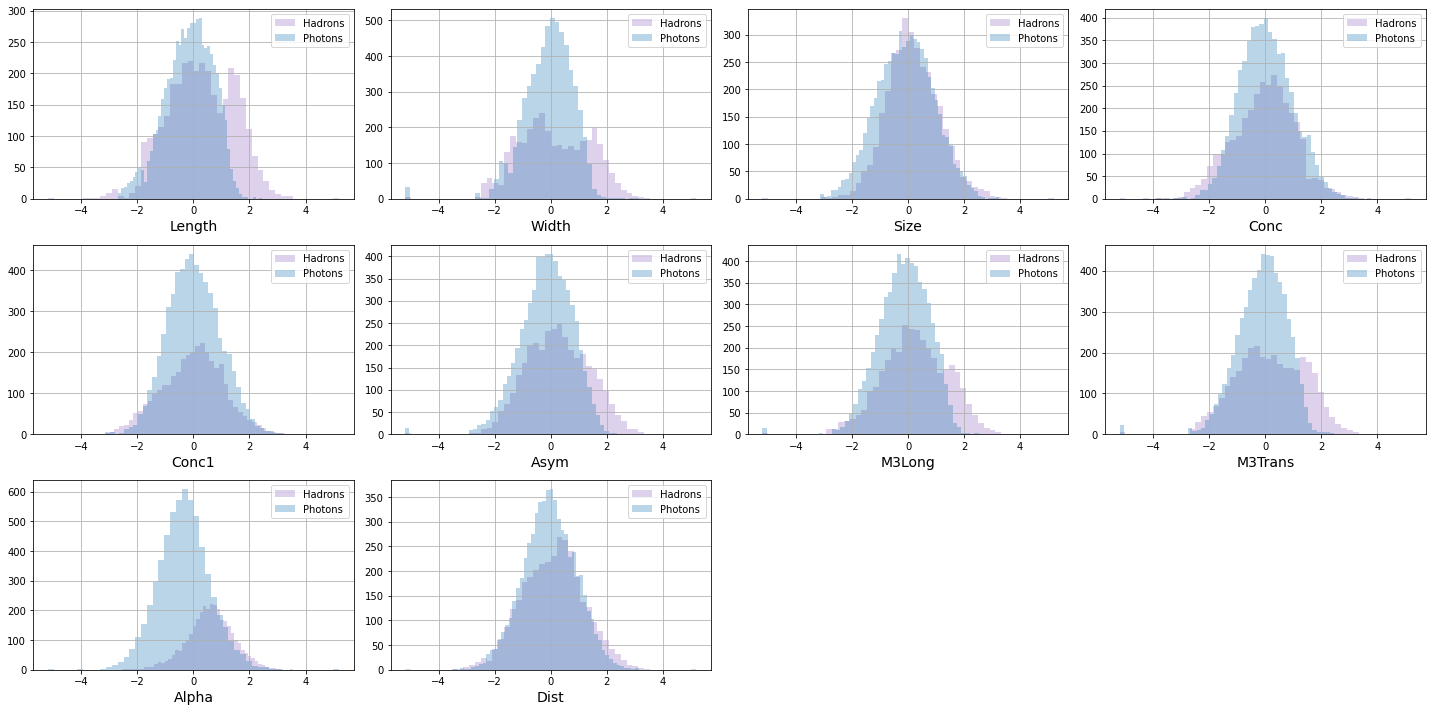

In [58]:
plot_hists(
    X_train[y_train[:, 0] == 0],
    X_train[y_train[:, 0] == 1],
    names,
    label1="Hadrons",
    label2="Photons",
    bins=50,
)

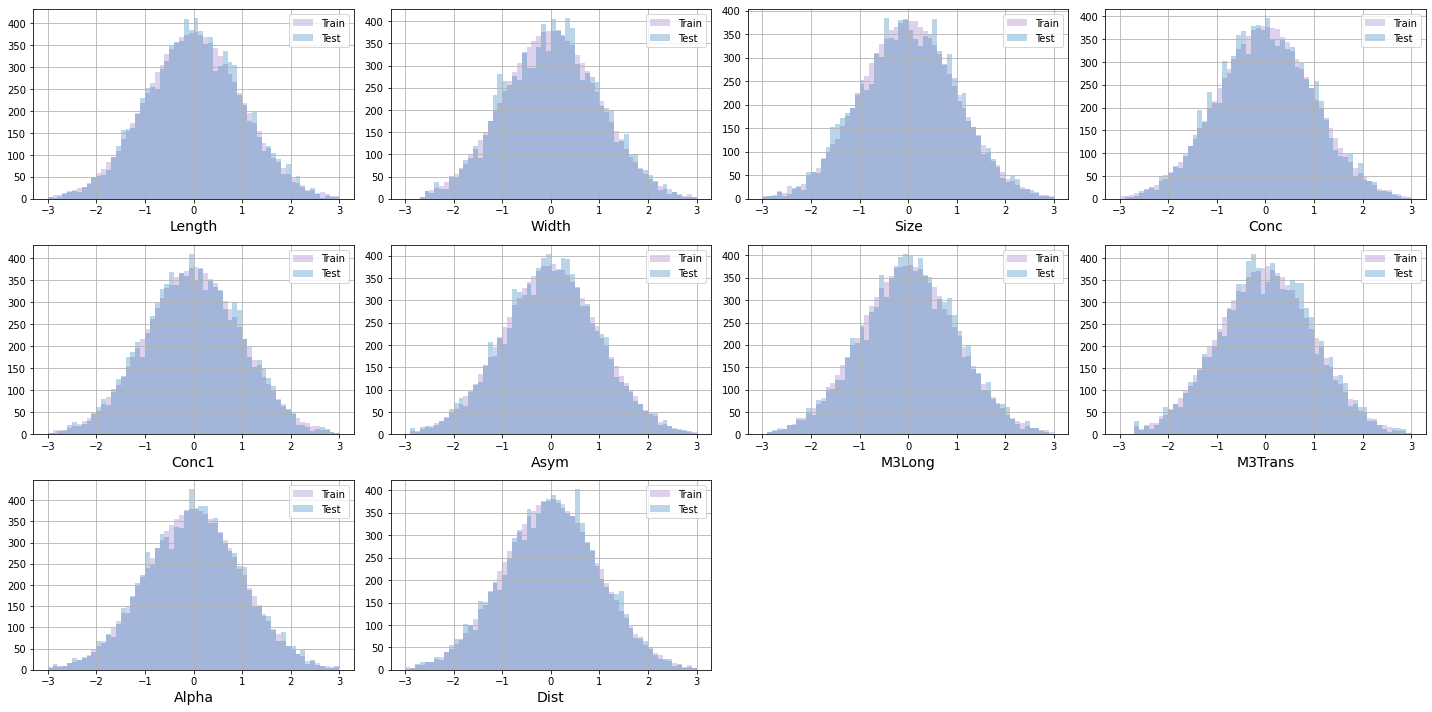

In [59]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

# Conditional WGAN

Мы будем использовать `Conditional WGAN`, который изображен на рисунке. В качестве условия `y` мы будем использовать метку класса: **0** - адрон, **1** - фотон. Таким образом, мы будем сообщать генератору для какой частицы нужно генерировать параметры изображения. 

<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/cgan.png?raw=1" width="800"></center>

Генератор $\hat{x} = G(z, y)$ будет принимать на вход шумовой вектор $z$ и вектор условий $y$, а выдавать будет сгенерированный (фейковый) вектор параметров $\hat{x}$. 

Дискриминатор $D(x, y)$ будет принимать на вход вектор параметров $x$ и вектор условий $y$, а возвращать будет рациональное число.

Обучать `Conditional WGAN` будем с такой функцией потерь:

$$L(G, D) = -\frac{1}{n} \sum_{x_i \in X, y_i \in y} D(x_i, y_i) + -\frac{1}{n} \sum_{z_i \in Z, y_i \in y} D(G(z_i, y_i), y_i) \to \max_G \min_D$$

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
DEVICE

device(type='cuda')

## Задание 3 (0.75 балла)

Реализуйте нейронную сеть для генератора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [9]:
class Generator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Generator, self).__init__()

        self.nn_s = nn.Sequential(
        nn.LazyLinear(100),
        nn.BatchNorm1d(100),
        nn.ReLU(),
        nn.Linear(100, 100),
        nn.BatchNorm1d(100),
        nn.ReLU(),
        nn.Linear(100, n_outputs)
        )

    def forward(self, z, y):
        zy = torch.cat((z, y), dim=1)
        return self.nn_s(zy)

## Задание 4 (0.5 балл)

Реализуйте функцию для генерации новый объектов $X$ по вектору условий $y$.

In [10]:
#y: 1 x d
def generate(generator, y, latent_dim):
    ### YOUR CODE IS HERE ######
    z = torch.normal(0, 1, size=latent_dim).to(DEVICE)
    X_fake = generator(z,y)
    ### THE END OF YOUR CODE ###
    return X_fake

#y: bs x d
def generate_batch(generator, y, latent_dim):
    ### YOUR CODE IS HERE ######
    z = torch.normal(0, 1, size=(y.shape[0], latent_dim)).to(DEVICE)
    X_fake = generator(z,y)
    ### THE END OF YOUR CODE ###
    return X_fake

## Задание 5 (0.75 балла)

Реализуйте нейронную сеть для дискриминатора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

Какая функция активации должна быть в конце работы модели и почему? А она вообще тут должна быть? Обоснуйте свой выбор.

In [11]:
class Discriminator(nn.Module):
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()

        self.nn_s = nn.Sequential(
        nn.LazyLinear(100),
        nn.ReLU(),
        nn.Linear(100, 100),
        nn.ReLU(),
        nn.Linear(100, 1), # возвращаем скор положительного класса 
        # nn.Sigmoid() 

        # https://www.youtube.com/watch?v=RdC4XeExDeY
        # для WGAN нам не нужна сигмоида
        # мы в процессе обучения ограничим веса линейных слоев 
        # для vanilla gan сигмоиду включал

        )

    def forward(self, x, y):
        xy = torch.cat((x, y), dim=1)
        return self.nn_s(xy)

## Задание 6 (0.5 балла)

Реализуйте функцию, которая принимала бы на вход набор сгенерированных и настоящих объектов, разбивала на train и test с учетом баланса классов (real и fake объектов), с соотношением 3 к 1, обучала модель линейной регрессии и градиентного бустинга, которые учились бы отличать настоящие объекты от фальшивых, после чего выводила бы accuracy score на отложенной выборке у обоих моделей.

Ответьте на вопрос: какое значение accuracy score нас бы удовлетворило больше всего? Почему?

In [8]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.4 MB/s eta 0:00:00


In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# numpy arrays 
def other_agent_score(X_real, y_real, X_fake, y_fake):
    X_real = np.concatenate((X_real, y_real), axis = 1)
    X_fake = np.concatenate((X_fake, y_fake), axis = 1)
    y_real = np.array([1]*y_real.shape[0])
    y_fake = np.array([0]*y_fake.shape[0])

    min_l = min(X_real.shape[0], X_fake.shape[0])
    max_l = max(X_real.shape[0], X_fake.shape[0])
    r_choice = np.random.choice(max_l, min_l, replace=False)

    # берем 50/50 настоящих и сгенерированных 
    X_final = np.concatenate((X_real[r_choice], X_fake[r_choice]), axis = 0)
    y_final = np.concatenate((y_real[r_choice], y_fake[r_choice]), axis = 0) # 1 настоящий 0 фейк

    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_final, y_final, test_size=0.25, shuffle = True, random_state = 1337
        )

    lr = LogisticRegression().fit(X_train_final, y_train_final)
    cb = CatBoostClassifier(silent=True).fit(X_train_final, y_train_final)
    
    # хотим получить accuracy = 0.5 - сгенерированные объекты неотличимы от настоящих
    lin_reg_score = accuracy_score(y_test_final, lr.predict(X_test_final))
    boosting_score = accuracy_score(y_test_final, cb.predict(X_test_final))
    
    print('Linear regression score: ' + str(lin_reg_score))
    print('Boosting score: ' + str(boosting_score))

In [10]:
# lets test
X_real = X_train[:2000]
y_real = y_train[:2000]
X_fake = np.random.rand(X_real.shape[0],X_real.shape[1]) 
y_fake = np.random.randint(0,2, y_real.shape)

other_agent_score(X_real, y_real, X_fake, y_fake)

Linear regression score: 0.927
Boosting score: 0.999


## Задание 7 (1.5 балла)

Реализуйте класс для обучения генеративной модели.

- Подсказка 1: не забывайте ограничивать веса дискриминатора. Для этого используйте `p.data.clamp_(-0.01, 0.01)`, где `p` веса дискриминатора.
- Подсказка 2: `n_critic` - число итераций обучения дискриминатора на одну итерацию обучения генератора.
- Подсказка 3: Используйте `X_tensor = torch.tensor(X_numpy, dtype=torch.float, device=DEVICE)` для перевода numpy в тензор.

In [42]:
from typing import Literal

# vanilla gan loss
def gan_loss(real_objects_scores: torch.Tensor,
             generated_objects_scores: torch.Tensor, 
             by: Literal["generator", "discriminator"] = "generator") -> torch.Tensor:
    if by=="generator":
        return torch.log(1 - generated_objects_scores).mean()
    elif by == "discriminator":
        return -torch.log(real_objects_scores).mean() - torch.log(1 - generated_objects_scores).mean()

# wgan loss https://arxiv.org/pdf/1701.07875v3.pdf
def wgan_loss(real_objects_scores: torch.Tensor,
             generated_objects_scores: torch.Tensor, 
             by: Literal["generator", "discriminator"] = "generator") -> torch.Tensor:
    if by=="generator":
        return -generated_objects_scores.mean()
    elif by == "discriminator":
        return -real_objects_scores.mean() + generated_objects_scores.mean()

class Fitter(object):
    def __init__(
        self,
        generator,
        discriminator,
        batch_size = 32,
        n_epochs = 10,
        latent_dim = 10,
        lr = 0.0001,
        n_critic=5,
    ):

        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic

        self.opt_gen = torch.optim.RMSprop(self.generator.parameters(), lr=self.lr)
        self.opt_disc = torch.optim.RMSprop(self.discriminator.parameters(), lr=self.lr)

        self.generator.to(DEVICE)
        self.discriminator.to(DEVICE)

    def fit(self, X, y):
        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.generator.train(True)
        self.discriminator.train(True)

        self.loss_history = []

        # Fit GAN
        for epoch in range(self.n_epochs):
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):

                # генерируем новые объекты
                generated_batch = generate_batch(self.generator, cond_batch, self.latent_dim)

                # считаем скоры
                real_objects_scores = self.discriminator(real_batch, cond_batch)
                generated_objects_scores = self.discriminator(generated_batch, cond_batch)
            
                # дискриминатор учится в 4 раза чаще, чем генератор
                if i%self.n_critic == 0:
                    # делаем шаг обучения генератора
                    self.opt_gen.zero_grad()
                    gen_loss = wgan_loss(real_objects_scores, generated_objects_scores, "generator")
                    gen_loss.backward()
                    self.opt_gen.step()
                else:
                    # делаем шаг обучения дискриминатора
                    self.opt_disc.zero_grad()
                    discr_loss = wgan_loss(real_objects_scores, generated_objects_scores, "discriminator")
                    discr_loss.backward()
                    self.opt_disc.step()

                    # ограничение весов линейный слоев дискриминатора 
                    for p in self.discriminator.parameters():
                      p.data.clamp_(-0.01, 0.01)


            # caiculate and store loss after an epoch
            Z_noise = torch.normal(0, 1, (len(X_real), self.latent_dim)).to(DEVICE)
            X_fake = self.generator(Z_noise, y_cond)
            loss_epoch = torch.mean(self.discriminator(X_real, y_cond)) - torch.mean(
                self.discriminator(X_fake, y_cond)
            )
            self.loss_history.append(loss_epoch.detach().cpu())
            
            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов 
            # И запустите работу фукнции other_agent_score
            
        r_choice = np.random.choice( X.shape[0], 1000, replace=False)
        y_real = y[r_choice]
        X_real = X[r_choice]

        y_fake = torch.randint(0,2, y_real.shape).to(DEVICE)
        X_fake = generate_batch(self.generator, y_fake, self.latent_dim) 

        other_agent_score(X_real, y_real,
                          X_fake.detach().cpu().numpy(),
                          y_fake.detach().cpu().numpy())    
            
        # Turn off training
        self.generator.train(False)
        self.discriminator.train(False)

обучение vanilla gan: 
1.   дискриминатор имеет nn.Sigmoid() последним слоем
2.   в процессе обучения p.data.clamp_(-0.01, 0.01) отсутсвует

лучшее полученное качество:
*   Linear regression score: 0.566
*   Boosting score: 0.66
*   AUC ROC boosting = 0.7126

обучение wasserstein gan:
1.   дискриминатор возвращает вещесвенное число без ограничений
2.   в процессе обучения p.data.clamp_(-0.01, 0.01) на все параметры линейных слоев дискриминатора

лучшее полученное качество: 
*   Linear regression score: 0.596
*   Boosting score: 0.618
*   AUC ROC boosting = 0.703



## Обучение
Обучим модель на данных.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.5, shuffle = True, random_state = 11
)
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

In [17]:
%%time
latent_dim = 10
generator = Generator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1]).to(DEVICE)
discriminator = Discriminator(n_inputs=X_train.shape[1] + y.shape[1]).to(DEVICE)

fitter = Fitter(
    generator,
    discriminator,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
    n_critic=5,
)
fitter.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Linear regression score: 0.62
Boosting score: 0.664
CPU times: user 1min 26s, sys: 3.54 s, total: 1min 29s
Wall time: 2min


<ipython-input-18-684ea810ad15>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1, linestyle="--", linewidth=0.5, color="0.5")


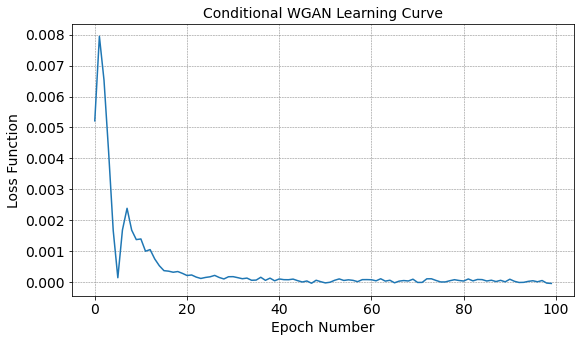

In [18]:
# WGAN learning curve
plt.figure(figsize=(9, 5))
plt.plot(fitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional WGAN Learning Curve", size=14)
plt.grid(b=1, linestyle="--", linewidth=0.5, color="0.5")
plt.show()

## Задание 8 (0.5 балла)

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`. Перед сравнением результатов сделайте обратное квантильное преобразование с помощью трансформера, который вы обучили в задании 2.

In [70]:
from sklearn.decomposition import PCA

def visualize_dots(X_real, X_fake):
  pca = PCA(n_components=2)
  real = pca.fit_transform(X_real)
  fake = pca.transform(X_fake)

  plt.figure(figsize=(10,8))
  plt.grid()
  plt.scatter(real[:, 0], real[:, 1], color = 'blue', label = 'real')
  plt.scatter(fake[:, 0], fake[:, 1], color = 'orange', label = 'fake')
  plt.legend(loc="best")

In [90]:
X_train = quantile_transformer.inverse_transform(X_train)
X_test = quantile_transformer.inverse_transform(X_test)

In [91]:
X_fake_train = generate_batch(fitter.generator, torch.tensor(y_train, dtype=torch.float, device=DEVICE), latent_dim).detach().cpu().numpy()
X_fake_train = quantile_transformer.inverse_transform(X_fake_train)

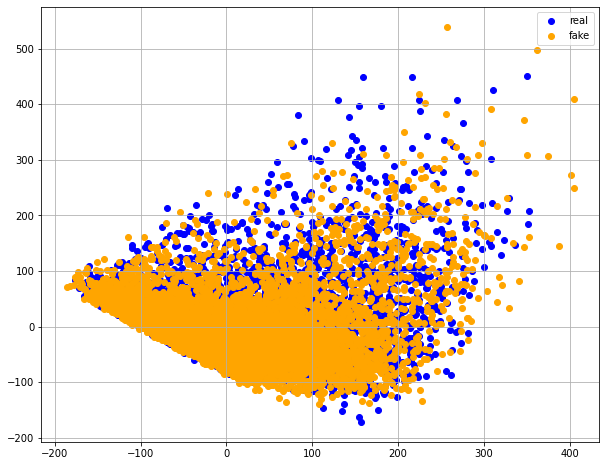

In [92]:
visualize_dots(X_train, X_fake_train)

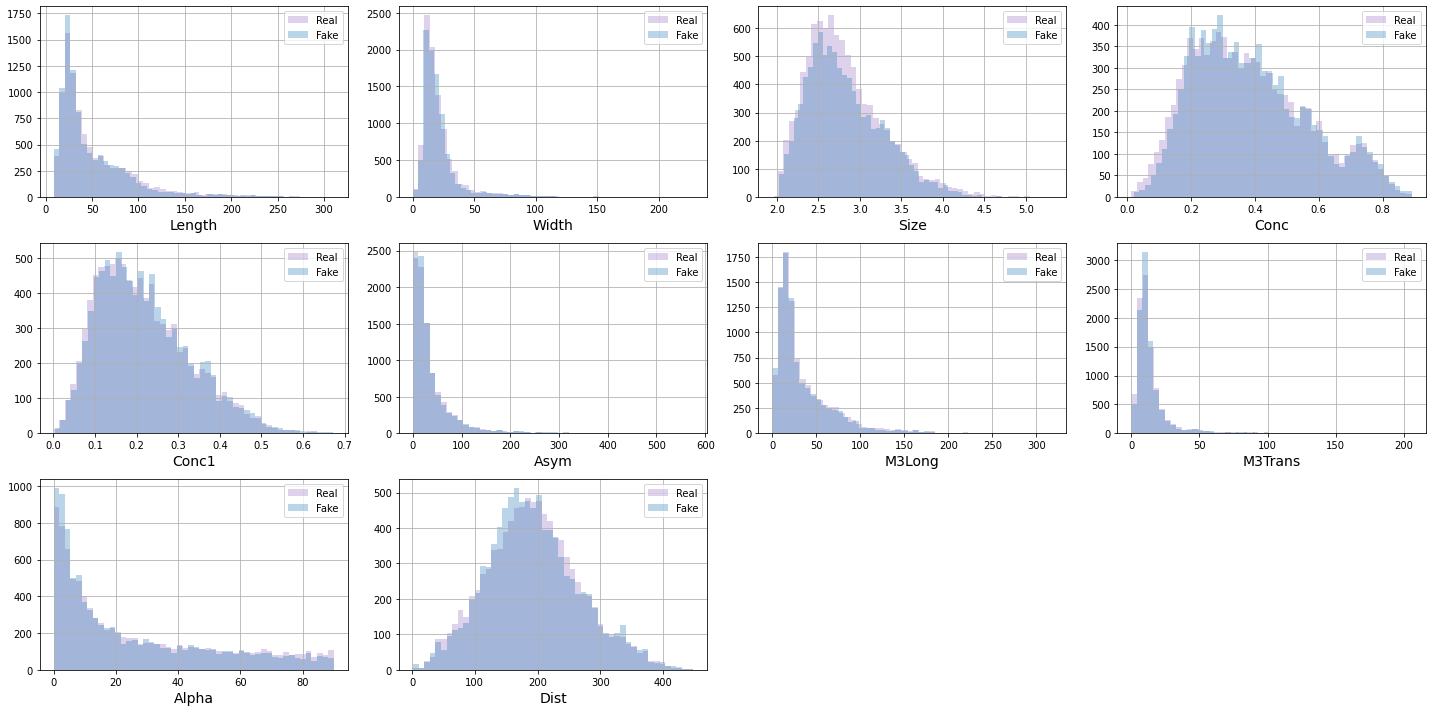

In [93]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

In [94]:
X_fake_test= generate_batch(fitter.generator, torch.tensor(y_test, dtype=torch.float, device=DEVICE), latent_dim).detach().cpu().numpy()
X_fake_test = quantile_transformer.inverse_transform(X_fake_test)

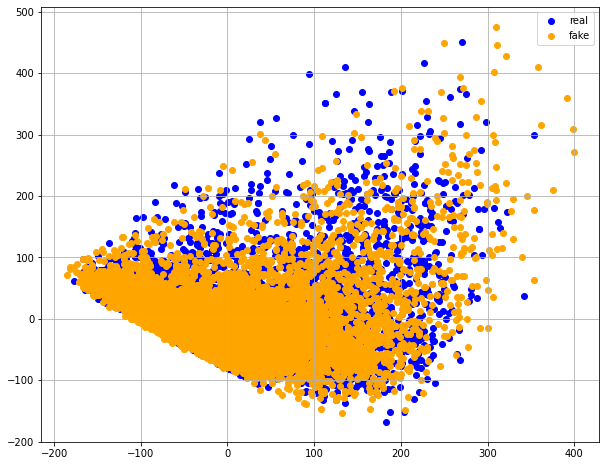

In [95]:
visualize_dots(X_test, X_fake_test)

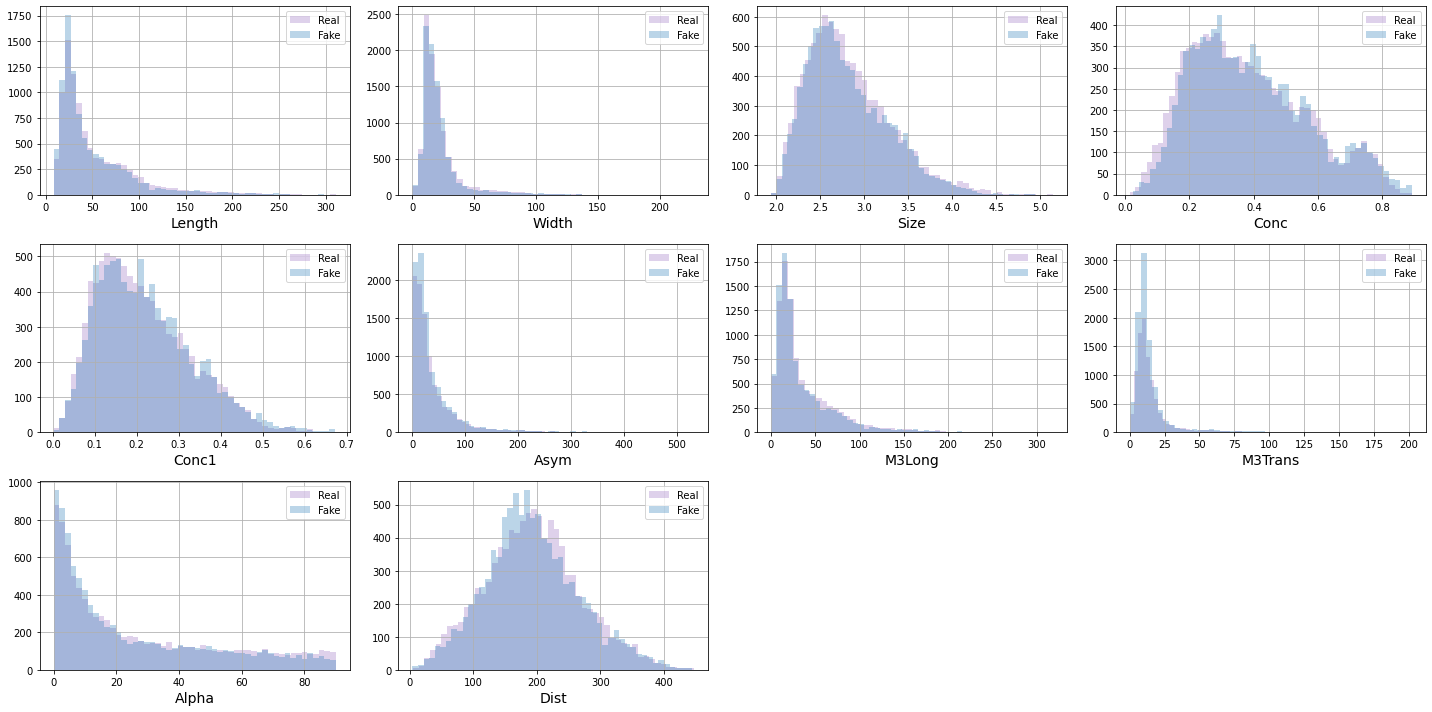

In [96]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

###Посмотрим на качество генератора отдельно для фотонов и адронов:

In [89]:
size = 2000

X_real_photons = X[:12332]
r_choice = np.random.choice(X_real_photons.shape[0], size, replace=False)
X_real_photons = X_real_photons[r_choice]

X_fake_photons = generate_batch(fitter.generator, torch.tensor([1]*size, dtype=torch.float, device=DEVICE).view(-1,1), latent_dim).detach().cpu().numpy()
X_fake_photons = quantile_transformer.inverse_transform(X_fake_photons)

In [98]:
other_agent_score(X_real_photons, np.ones(size).reshape(-1,1), X_fake_photons, np.ones(size).reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear regression score: 0.568
Boosting score: 0.712


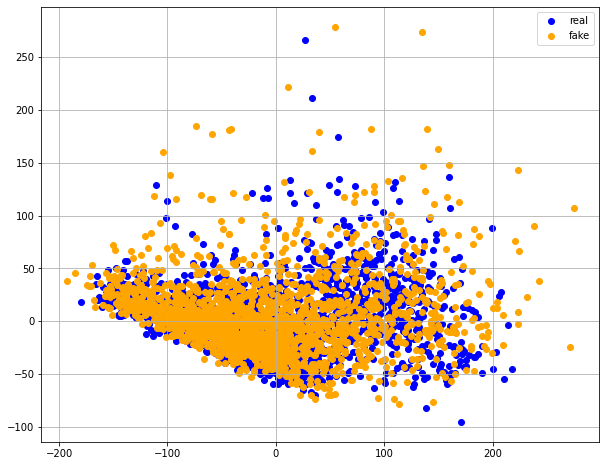

In [91]:
visualize_dots(X_real_photons, X_fake_photons)

In [93]:
X_real_hadrons = X[12332:]
r_choice = np.random.choice(X_real_hadrons.shape[0], size, replace=False)
X_real_hadrons = X_real_hadrons[r_choice]

X_fake_hadrons = generate_batch(fitter.generator, torch.tensor([0]*size, dtype=torch.float, device=DEVICE).view(-1,1), latent_dim).detach().cpu().numpy()
X_fake_hadrons = quantile_transformer.inverse_transform(X_fake_hadrons)

In [97]:
other_agent_score(X_real_hadrons, np.zeros(size).reshape(-1,1), X_fake_hadrons, np.zeros(size).reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear regression score: 0.595
Boosting score: 0.737


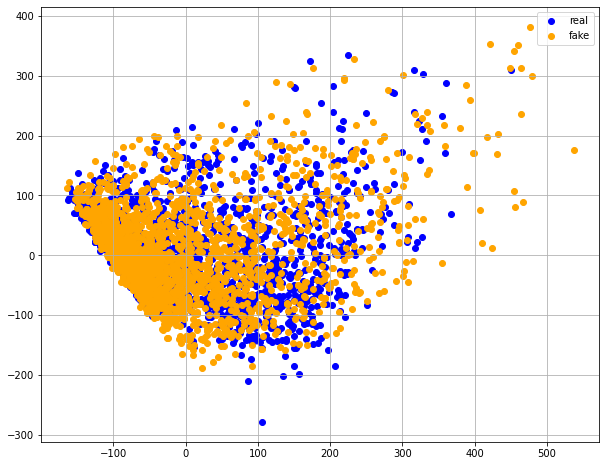

In [99]:
visualize_dots(X_real_hadrons, X_fake_hadrons)

для фотонов и адронов работет одинаково хорошо

## Вывод: 
Визуально мы видим сходство реальных и фейковых данных. Однако это только проекции 10-мерных объектов на одну ось.

визуально мы также видим, что PCA проекции данных на плоскость линейно не разделими и похожи по форме, что радует глаз

## Измерение качества генерации

<center><img src="https://github.com/lemon-doge/iad-applied-ds/blob/master/2023/hw/hw1/img/clf.png?raw=1" width="600"></center>

Измерим сходство распределений классификатором.

In [97]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [99]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.7101555504693161


## Задание 9 (0.5 балла)

Опишите ваш эксперимент. Как вы оцениваете полученные результаты? Как вы думаете, какое значение ROC AUC нас удовлетворяет больше всего? Почему?


WGAN и vanilla gan выдают сравнимые результаты, WGAN показывает небольшое преимущество. В идеале увидеть ROC AUC = 0.5 - бустинг не может отличить сгенерированные данные от реальных. Скорее всего, результат можно улучшить при помощи более мощных сетей.

## Диффузионные модели.

Давайте теперь проведем такой же экперимент с простой диффузионной моделью.

ориентировался на https://colab.research.google.com/drive/1sjy9odlSSy0RBVgMTgP7s99NXsqglsUL?usp=sharing#scrollTo=Rj17psVw7Shg

## Задание 10 (0.5 балла)

Реализуйте фукнцию из семинара для зашумления данных, адаптировав ее под наш тип данных.


а зачем она нам, если за нас все делает DDPMScheduler?

In [11]:
# x: bs x d
# amount: float tensor 1x1
def corrupt(x, amount):
    """Corrupt the input `x` by mixing it with noise according to `amount`"""
    noise = torch.rand_like(x)
    amount = amount.view(-1, 1) # Sort shape so broadcasting works
    return x*(1-amount) + noise*amount 

## Добавим sсheduler, он пригодится вам при обучении модели

In [12]:
!pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.2 MB/s eta 0:00:00


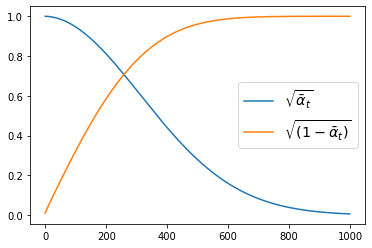

In [13]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

## Задание 11 (0.5 балла)

Реализуйте нейронную сеть. В качетсве архитектуры можете взять модель генератора. В процессе экспериментов попробуйте изменять архитектуру модели для улучшения качества сгенерированных объектов (Кстати, как вы будете качество измерять?). 

- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

качество измерять буду смотря на покоодинатный MSE лосс, и на accuracy классических дискриминаторов (бустинга и регрессии) по аналогии с ганами 

In [22]:
class DiffusionGenerator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(DiffusionGenerator, self).__init__()

        self.nn_s = nn.Sequential(
        nn.LazyLinear(100),
        nn.BatchNorm1d(100),
        nn.ReLU(),
        nn.Linear(100, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Linear(256, 100),
        nn.BatchNorm1d(100),
        nn.ReLU(),
        nn.Linear(100, n_outputs)
        )

    # predicts noise added to vector 
    # accepts embedded timesteps
    def forward(self, noisy_x, condition, timesteps):
        return self.nn_s(torch.cat([noisy_x, condition, timesteps], dim=1))

##positional encodings for timesteps

In [15]:
# https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

# np positional encodigns
def positionalEncodingsMatrix(shape_0, embeddings_dim, n=10000):
    P = np.zeros((shape_0, embeddings_dim))
    for k in range(shape_0):
        for i in np.arange(int(embeddings_dim/2)):
            denominator = np.power(n, 2*i/embeddings_dim)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [55]:
PosEncodingsTensor = torch.FloatTensor(positionalEncodingsMatrix(1000, 10)).to(DEVICE)
PosEncodingsTensor[950:960]

tensor([[ 0.9455,  0.3257, -0.2295,  0.9733, -0.9550,  0.2965, -0.5975, -0.8018,
          0.5642,  0.8257],
        [ 0.7849, -0.6196, -0.0730,  0.9973, -0.9473,  0.3203, -0.6007, -0.7995,
          0.5647,  0.8253],
        [-0.0973, -0.9953,  0.0853,  0.9964, -0.9390,  0.3440, -0.6039, -0.7971,
          0.5652,  0.8250],
        [-0.8900, -0.4559,  0.2415,  0.9704, -0.9300,  0.3675, -0.6071, -0.7946,
          0.5657,  0.8246],
        [-0.8645,  0.5026,  0.3916,  0.9201, -0.9205,  0.3908, -0.6102, -0.7922,
          0.5662,  0.8242],
        [-0.0442,  0.9990,  0.5319,  0.8468, -0.9104,  0.4138, -0.6134, -0.7898,
          0.5668,  0.8239],
        [ 0.8168,  0.5769,  0.6589,  0.7522, -0.8997,  0.4365, -0.6165, -0.7873,
          0.5673,  0.8235],
        [ 0.9268, -0.3756,  0.7694,  0.6388, -0.8885,  0.4589, -0.6196, -0.7849,
          0.5678,  0.8232],
        [ 0.1847, -0.9828,  0.8605,  0.5094, -0.8767,  0.4811, -0.6228, -0.7824,
          0.5683,  0.8228],
        [-0.7272, -

## Задание 12 (0.5 балла)

Напишите функцию для генерации нового объекта с помощью обученной модели.

In [88]:
from tqdm import tqdm
# noisy_x: bs x d
# condition: bs x condition_dim
def diff_generate(generator, noisy_x, condition, noise_scheduler):

    for i, timestep in tqdm(enumerate(noise_scheduler.timesteps)):
      # Get model pred
      with torch.no_grad():
        timesteps = PosEncodingsTensor[timestep] * torch.ones(noisy_x.shape[0],1).to(DEVICE)
        # timesteps = timestep * torch.ones(noisy_x.shape[0],1).to(DEVICE)
        residual = generator(noisy_x, condition, timesteps)  # Again, note that we pass in our labels y

      # Update sample with step
      noisy_x = noise_scheduler.step(residual, timestep, noisy_x).prev_sample

    return noisy_x

## Задание 13 (2 балла)

Напишите класс обучения диффузионной модели и обучите модель, после чего опишите полученные результаты. В качестве подсказки - опирайтесь на семинар по диффузионным моделям. Вы можете изменять некоторые части кода для вашего удобства, но оставляйте в таком случаи комментарии, пожалуйста.

In [89]:
class DiffusionFitter(object):
    def __init__(
        self,
        model,
        noise_scheduler,
        timesteps_pos_encodings_tensor,
        batch_size = 32,
        n_epochs = 10,
        latent_dim = 1,
        lr = 0.0001,
    ):

        self.model = model
        self.noise_scheduler = noise_scheduler
        self.timesteps_pos_encodings_tensor = timesteps_pos_encodings_tensor

        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr

        self.loss_fn = nn.MSELoss()
        self.optimizer = torch.optim.RMSprop(self.model.parameters(), lr=self.lr)

        self.model.to(DEVICE)

    def fit(self, X, y):

        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.model.train(True)

        self.loss_history = []

        # Fit diffusion model 
        for epoch in range(self.n_epochs):
            loss_epoch = 0
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):

                ### YOUR CODE IS HERE ######
                noise = torch.randn_like(real_batch)
                timesteps = torch.randint(0, 999, (real_batch.shape[0],1)).long().to(DEVICE)
                noisy_x = self.noise_scheduler.add_noise(real_batch, noise, timesteps)

                # we neeed the positional encodings for timesteps
                timesteps = self.timesteps_pos_encodings_tensor[timesteps.squeeze(1)]

                # Get the model prediction
                pred = self.model(noisy_x, cond_batch, timesteps) # Note that we pass in the labels y

                # Calculate the loss
                loss = self.loss_fn(pred, noise) # How close is the output to the noise

                # Backprop and update the params:
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                # Store the loss for later
                loss_epoch += loss.item() #TODO: доделать UPD: и так сойдет 
                ### THE END OF YOUR CODE ###

            # caiculate and store loss after an epoch
            self.loss_history.append(loss_epoch)
            if epoch > 0 and epoch%10 == 0:
              for g in self.optimizer.param_groups:
                g['lr'] = max(0.00001, g['lr']/2)
                print(f"lr: {g['lr']}")
            
            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов 
            # И запустите работу фукнции other_agent_score
            
            ### YOUR CODE IS HERE ######
            r_choice = np.random.choice(y_cond.shape[0], 1000, replace=False)
            y_real_sample = y_cond[r_choice]
            X_real_sample = X_real[r_choice]

            noise = torch.randn_like(X_real_sample).to(DEVICE)

            # y_fake = torch.randint(0,2, y_real_sample.shape).to(DEVICE)
            y_fake = y_real_sample
            X_fake = diff_generate(self.model, noise, y_fake, self.noise_scheduler)

            other_agent_score(X_real_sample.detach().cpu().numpy(),
                              y_real_sample.detach().cpu().numpy(),
                              X_fake.detach().cpu().numpy(),
                              y_fake.detach().cpu().numpy())  
            
            print(f'loss epoch {epoch}: {self.loss_history[-1]}')
            ### THE END OF YOUR CODE ###
            
        # Turn off training
        self.model.train(False)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.5, shuffle = True, random_state = 11
)
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

In [91]:
%%time
latent_dim = 10
model = DiffusionGenerator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1])
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

diffusionFitter = DiffusionFitter(
    model,
    noise_scheduler,
    PosEncodingsTensor,
    batch_size=50,
    n_epochs=30,
    latent_dim=latent_dim,
    lr=0.0001,
)

diffusionFitter.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
1000it [00:01, 869.67it/s]


Linear regression score: 0.696
Boosting score: 0.948
loss epoch 0: 88.67352819442749


1000it [00:01, 865.59it/s]


Linear regression score: 0.802
Boosting score: 0.956
loss epoch 1: 64.15851470828056


1000it [00:01, 628.32it/s]


Linear regression score: 0.826
Boosting score: 0.982
loss epoch 2: 59.16315186023712


1000it [00:01, 860.59it/s]


Linear regression score: 0.916
Boosting score: 0.976
loss epoch 3: 55.05214287340641


1000it [00:01, 847.48it/s]


Linear regression score: 0.986
Boosting score: 1.0
loss epoch 4: 53.781039744615555


1000it [00:01, 869.56it/s]


Linear regression score: 0.928
Boosting score: 0.992
loss epoch 5: 51.43318468332291


1000it [00:01, 865.75it/s]


Linear regression score: 0.912
Boosting score: 0.988
loss epoch 6: 50.422754764556885


1000it [00:01, 636.57it/s]


Linear regression score: 0.984
Boosting score: 0.994
loss epoch 7: 50.5150206387043


1000it [00:02, 436.23it/s]


Linear regression score: 0.978
Boosting score: 0.996
loss epoch 8: 49.969771444797516


1000it [00:01, 882.55it/s]


Linear regression score: 0.968
Boosting score: 0.994
loss epoch 9: 51.41221423447132
lr: 5e-05


1000it [00:01, 702.39it/s]


Linear regression score: 0.824
Boosting score: 0.974
loss epoch 10: 49.41921894997358


1000it [00:01, 749.39it/s]


Linear regression score: 0.706
Boosting score: 0.978
loss epoch 11: 50.16762228310108


1000it [00:01, 892.18it/s]


Linear regression score: 0.824
Boosting score: 0.986
loss epoch 12: 48.28021518886089


1000it [00:01, 568.38it/s]


Linear regression score: 0.884
Boosting score: 0.988
loss epoch 13: 49.7299028635025


1000it [00:01, 895.34it/s]


Linear regression score: 0.944
Boosting score: 0.99
loss epoch 14: 49.04465773701668


1000it [00:01, 895.42it/s]


Linear regression score: 0.954
Boosting score: 0.988
loss epoch 15: 49.11758556962013


1000it [00:01, 880.11it/s]


Linear regression score: 0.958
Boosting score: 0.992
loss epoch 16: 48.17210242152214


1000it [00:01, 850.78it/s]


Linear regression score: 0.958
Boosting score: 0.986
loss epoch 17: 49.61525824666023


1000it [00:01, 633.94it/s]


Linear regression score: 0.92
Boosting score: 0.988
loss epoch 18: 48.146218970417976


1000it [00:01, 518.17it/s]


Linear regression score: 0.87
Boosting score: 0.978
loss epoch 19: 49.12165232002735
lr: 2.5e-05


1000it [00:01, 587.81it/s]


Linear regression score: 0.882
Boosting score: 0.994
loss epoch 20: 48.77305868268013


1000it [00:01, 748.77it/s]


Linear regression score: 0.924
Boosting score: 0.994
loss epoch 21: 48.514520183205605


1000it [00:01, 834.86it/s]


Linear regression score: 0.962
Boosting score: 0.988
loss epoch 22: 48.28666689991951


1000it [00:01, 836.14it/s]


Linear regression score: 0.928
Boosting score: 0.994
loss epoch 23: 48.11152079701424


1000it [00:01, 875.62it/s]


Linear regression score: 0.868
Boosting score: 0.99
loss epoch 24: 47.826563492417336


1000it [00:01, 787.79it/s]


Linear regression score: 0.87
Boosting score: 0.998
loss epoch 25: 48.049491599202156


1000it [00:01, 845.76it/s]


Linear regression score: 0.888
Boosting score: 0.982
loss epoch 26: 48.28113569319248


1000it [00:01, 845.08it/s]


Linear regression score: 0.932
Boosting score: 0.988
loss epoch 27: 47.99173283576965


1000it [00:01, 621.78it/s]


Linear regression score: 0.966
Boosting score: 0.994
loss epoch 28: 48.60844026505947


1000it [00:01, 861.45it/s]


Linear regression score: 0.944
Boosting score: 0.998
loss epoch 29: 47.64963185787201
CPU times: user 3min 26s, sys: 20.4 s, total: 3min 46s
Wall time: 2min 49s


Experiments:

default generator:
*   best boosting score:0.956
*   best loss epoch: loss epoch 89: 46.49299071729183



<ipython-input-92-c0916e68e8fe>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1, linestyle="--", linewidth=0.5, color="0.5")


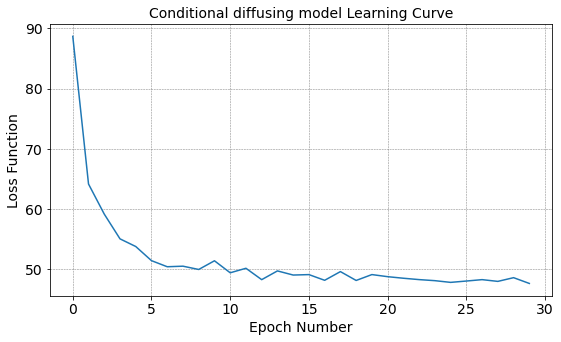

In [92]:
# diffusion learning curve
plt.figure(figsize=(9, 5))
plt.plot(diffusionFitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional diffusing model Learning Curve", size=14)
plt.grid(b=1, linestyle="--", linewidth=0.5, color="0.5")
plt.show()

## Задание 14 (0.5 балла)
По аналогии с прошлым экспериментом с GAN моделью сгенерируйте выборку фейковых объектов равную размеру тестовой выборки и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с GAN моделью?

In [93]:
X_train = quantile_transformer.inverse_transform(X_train)
X_test = quantile_transformer.inverse_transform(X_test)

In [94]:
noise = torch.randn(X_train.shape).to(DEVICE)
X_fake_train = diff_generate(diffusionFitter.model, noise,
                             torch.tensor(y_train, dtype=torch.float, device=DEVICE),
                             diffusionFitter.noise_scheduler).detach().cpu().numpy()
X_fake_train = quantile_transformer.inverse_transform(X_fake_train)

1000it [00:01, 755.81it/s]


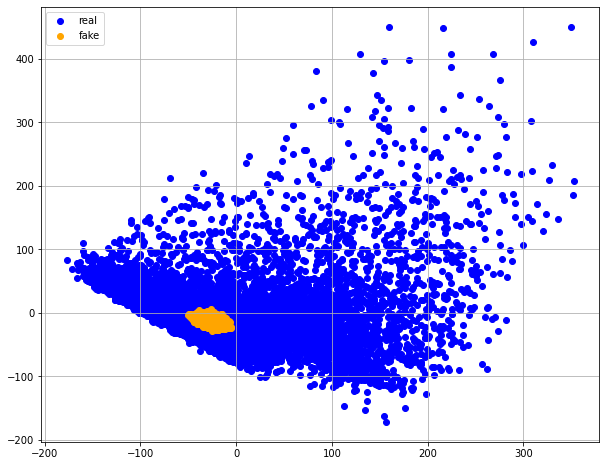

In [95]:
visualize_dots(X_train, X_fake_train)

In [96]:
noise = torch.randn(X_test.shape).to(DEVICE)
X_fake_test = diff_generate(diffusionFitter.model, noise,
                             torch.tensor(y_test, dtype=torch.float, device=DEVICE),
                             diffusionFitter.noise_scheduler).detach().cpu().numpy()
X_fake_test = quantile_transformer.inverse_transform(X_fake_test)

1000it [00:01, 609.29it/s]


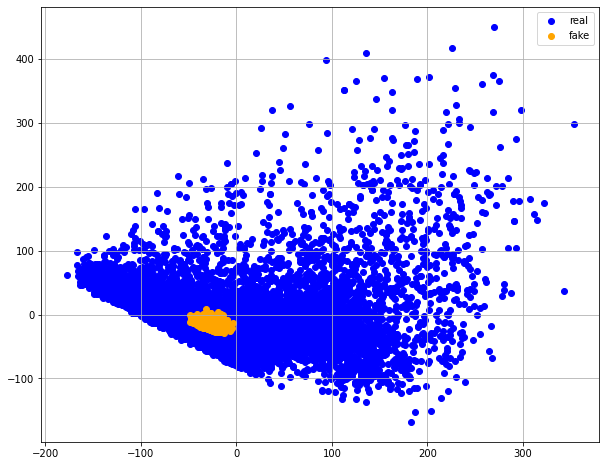

In [97]:
visualize_dots(X_test, X_fake_test)

In [100]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [102]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.999999060151415


## Вопросы:

очевидно, генеративная модель не обучилась, несмотря на использование позиционных эмбеддингов для временных шагов, немного более сильную архитектуру и подбор lr

возможно, размерность позиционных эмбеддингов стоило взять другую (побольше или поменьше?)

я так и не понял, реализует ли DDPMScheduler нелинейное добавление шума, может, в этом проблема 

возможно, нужна более мощная сеть

в общем, почему так могло произойти, что не так с моей диффузионной моделью?


## Отзыв

Поздравляю! Вы дошли до конца. Оставьте ваш отзыв ячейкой ниже или отправьте его в канал курса, нам будет очень интересно!

спасибо за очень интересную домашку) 

сеттинг просто захватывающий!)